In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df=pd.read_csv('./Datasets/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,Unknown Cabin,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,Unknown Cabin,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,Unknown Cabin,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,Unknown Cabin,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,Unknown Cabin,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [25]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [26]:
dfe=df[['Survived','Pclass','Sex','Age']]
dfe

,Survived,Pclass,Sex,Age
0,0,3,male,22.000000
1,1,1,female,38.000000
2,1,3,female,26.000000
3,1,1,female,35.000000
4,0,3,male,35.000000
...,...,...,...,...
886,0,2,male,27.000000
887,1,1,female,19.000000
888,0,3,female,29.699118
889,1,1,male,26.000000


In [27]:
from sklearn.preprocessing import LabelEncoder

In [23]:
sex=dfe['Sex']
sex

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [31]:
le=LabelEncoder()
dfe['Sex']=le.fit_transform(dfe['Sex'])

C:\Users\mkkar\AppData\Local\Temp\ipykernel_14212\1645479625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfe['Sex']=le.fit_transform(dfe['Sex'])


In [32]:
dfe

,Survived,Pclass,Sex,Age
0,0,3,1,22.000000
1,1,1,0,38.000000
2,1,3,0,26.000000
3,1,1,0,35.000000
4,0,3,1,35.000000
...,...,...,...,...
886,0,2,1,27.000000
887,1,1,0,19.000000
888,0,3,0,29.699118
889,1,1,1,26.000000


In [33]:
class_mapping = dict(zip(dfe['Sex'], le.classes_))
print(class_mapping)

{1: 'female', 0: 'male'}


In [34]:
print("Mapping of encoded values to original labels:")
for encoded_value, original_label in class_mapping.items():
    print(f"{encoded_value}: {original_label}")

Mapping of encoded values to original labels:
1: female
0: male


In [35]:
survived=dfe['Survived']
survived

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [36]:
dfe=dfe.drop('Survived',axis=1)
dfe

,Pclass,Sex,Age
0,3,1,22.000000
1,1,0,38.000000
2,3,0,26.000000
3,1,0,35.000000
4,3,1,35.000000
...,...,...,...
886,2,1,27.000000
887,1,0,19.000000
888,3,0,29.699118
889,1,1,26.000000


In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfe, survived, test_size=0.2, random_state=0)



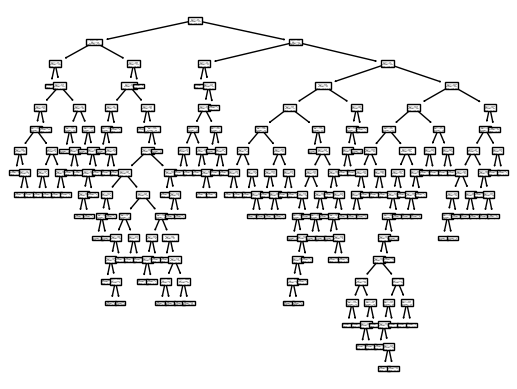

In [55]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

tree.plot_tree(clf)

plt.show()



### Here we used Gini impurity as the criterion to split the nodes. The Gini impurity is a measure of how often a randomly chosen element would be incorrectly classified. It reaches its minimum (zero) when all cases in the node fall into a single target category. The Gini impurity can be computed by the following formula:

$$Gini = 1 - \sum_{i=1}^{n} p_i^2$$

#### where $p_i$ is the probability of class i. The Gini impurity is used to calculate the Gini gain, which is the difference between the Gini impurity of the parent node and the sum of the weighted Gini impurity of the child nodes. The Gini gain is calculated by the following formula:

$$GiniGain = Gini(parent) - \sum_{i=1}^{n} \frac{N_i}{N} Gini(child_i)$$

#### where $N_i$ is the number of samples in the child node i and N is the number of samples in the parent node. The Gini gain is used to determine the best split at each node of the tree. The split with the highest Gini gain is selected as the best split. The Gini gain is calculated for each feature and each value of the feature. The feature and value with the highest Gini gain is selected as the best feature and best value to split the node.

#### The decision tree is built recursively by splitting the nodes until the maximum depth is reached or the number of samples in the node is less than the minimum number of samples required to split the node. The maximum depth and the minimum number of samples required to split the node are hyperparameters that can be tuned to improve the performance of the decision tree. The decision tree is used to make predictions by traversing the tree from the root node to the leaf node. The leaf node contains the predicted class label.

#### The decision tree is evaluated using the accuracy score, which is the proportion of correctly classified samples. The accuracy score is calculated by the following formula:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$


### Implementation
We will implement the decision tree algorithm using the following steps:
1. Prepare the data.
2. Split the data into a training set and a test set.
3. Train the decision tree algorithm using the training set.
4. Make predictions using the test set.
5. Evaluate the decision tree algorithm using the accuracy score.
